In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

11493376/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/12
469/469 [==============================] - 143s 304ms/step - loss: 2.2990 - accuracy: 0.1300 - val_loss: 2.2436 - val_accuracy: 0.3801
Epoch 2/12
469/469 [==============================] - 143s 304ms/step - loss: 2.2388 - accuracy: 0.2389 - val_loss: 2.1660 - val_accuracy: 0.5873
Epoch 3/12
469/469 [==============================] - 142s 304ms/step - loss: 2.1612 - accuracy: 0.3550 - val_loss: 2.0595 - val_accuracy: 0.6504
Epoch 4/12
469/469 [==============================] - 142s 303ms/step - loss: 2.0569 - accuracy: 0.4483 - val_loss: 1.9121 - val_accuracy: 0.6963
Epoch 5/12
469/469 [==============================] - 142s 302ms/step - loss: 1.9188 - accuracy: 0.5113 - val_loss: 1.7193 - val_accuracy: 0.7329
Epoch 6/12
469/469 [==============================] - 142s 302ms/step - loss: 1.7386 - accuracy: 0.5662 - val_loss: 1.4933 - val_acc

In [ ]:
!pip install shap

In [50]:
# ...include code from https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

import shap
import numpy as np

# select a set of background examples to take an expectation over
background = x_train[np.random.choice(x_train.shape[0], 1000, replace=False)]

# explain predictions of the model on three images
e = shap.DeepExplainer(model, background)
# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
shap_values = e.shap_values(x_test[:20])

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


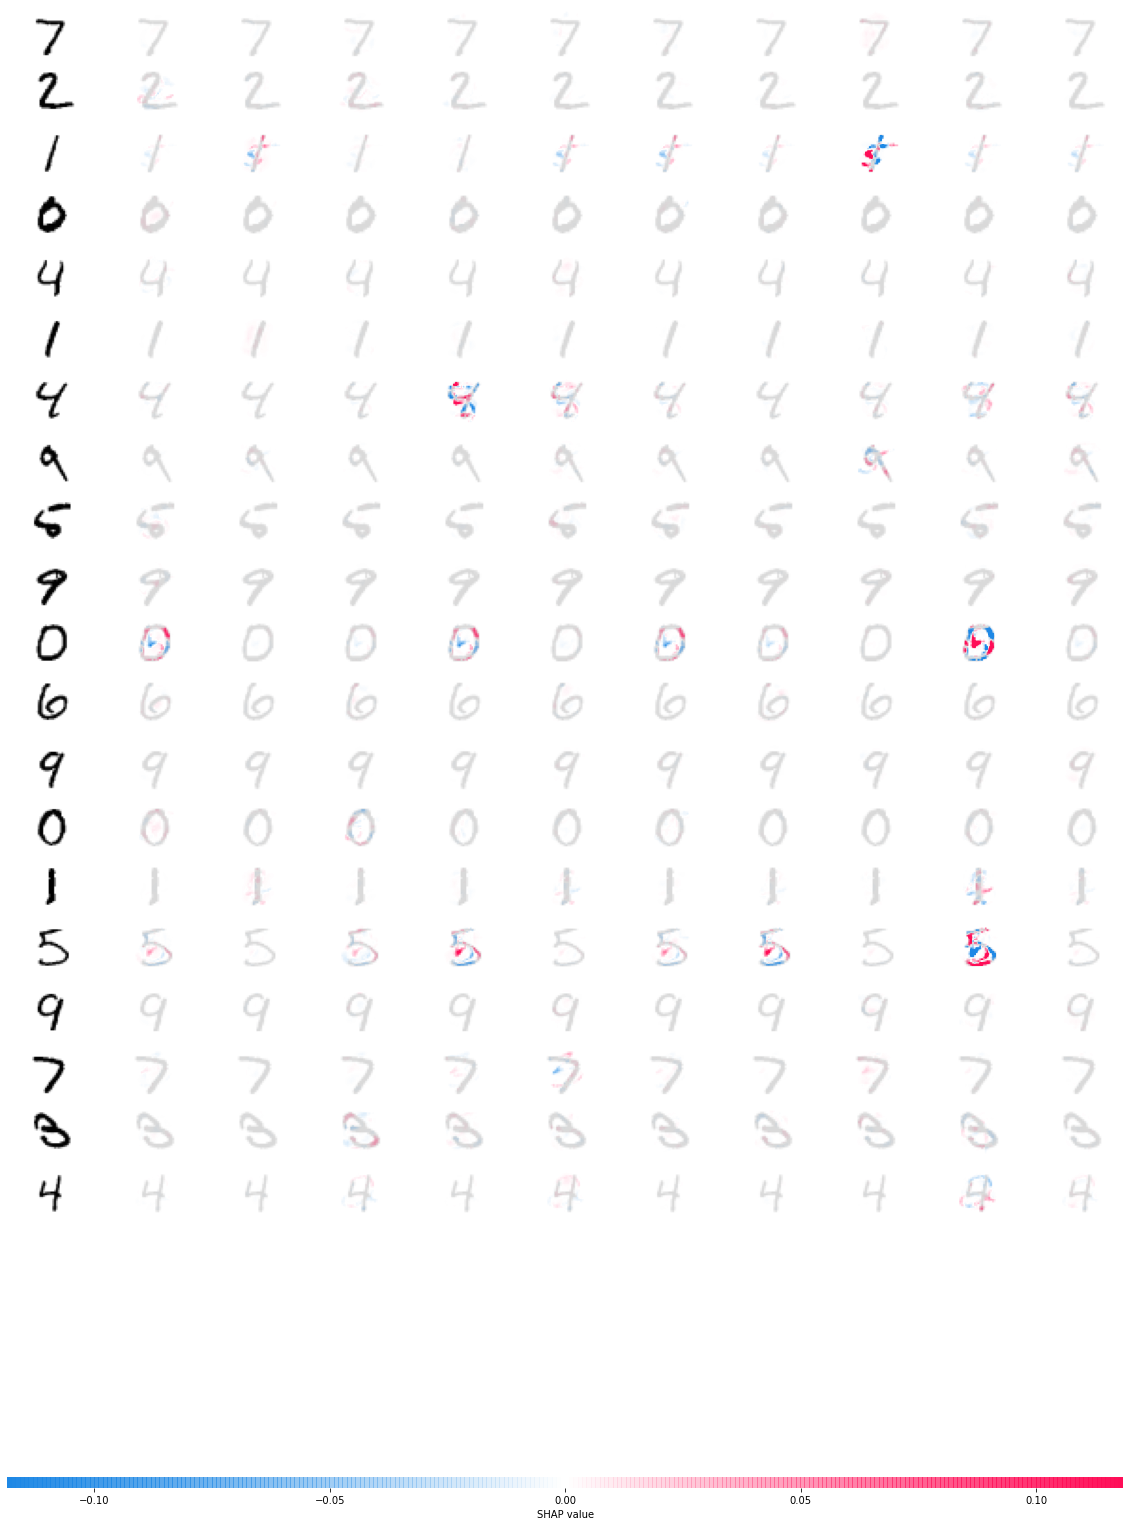

In [51]:
shap_values = e.shap_values(x_test[0:20])
shap.image_plot(shap_values, -x_test[0:20])

In [42]:
import pickle
pickle.dump(x_test[:20], open('./image_x_test.pkl', 'wb'))
pickle.dump(shap_values, open('./image_shap_values.pkl', 'wb'))

In [39]:
!ls -la -h

total 3.2M
drwxr-xr-x 1 root root 4.0K Apr 18 08:14 .
drwxr-xr-x 1 root root 4.0K Apr 18 07:28 ..
drwxr-xr-x 4 root root 4.0K Apr  7 13:35 .config
-rw-r--r-- 1 root root 3.0M Apr 18 09:08 image_shap_values.pkl
-rw-r--r-- 1 root root 154K Apr 18 09:08 image_x_test.pkl
drwxr-xr-x 1 root root 4.0K Apr  7 13:36 sample_data
